In [22]:
import pandas as pd
from datetime import datetime
import numpy as np
import os 
path  = os.getcwd()
print(path)

In [23]:
retail = pd.read_csv(r'{0}/online_retail2.csv'.format(path))

In [24]:
retail = retail.drop_duplicates()

In [25]:
retail = retail.dropna(axis=0, how='any')

In [26]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


In [27]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [28]:
retail['InvoiceDate'] 

0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                  ...        
1067366   2011-12-09 12:50:00
1067367   2011-12-09 12:50:00
1067368   2011-12-09 12:50:00
1067369   2011-12-09 12:50:00
1067370   2011-12-09 12:50:00
Name: InvoiceDate, Length: 797885, dtype: datetime64[ns]

In [29]:
retail['InvoiceDate'].dt.year

0          2009
1          2009
2          2009
3          2009
4          2009
           ... 
1067366    2011
1067367    2011
1067368    2011
1067369    2011
1067370    2011
Name: InvoiceDate, Length: 797885, dtype: int64

In [30]:
retail['InvoiceDate'].dt.week

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


0          49
1          49
2          49
3          49
4          49
           ..
1067366    49
1067367    49
1067368    49
1067369    49
1067370    49
Name: InvoiceDate, Length: 797885, dtype: int64

In [31]:
retail['InvoiceDate'].dt.month

0          12
1          12
2          12
3          12
4          12
           ..
1067366    12
1067367    12
1067368    12
1067369    12
1067370    12
Name: InvoiceDate, Length: 797885, dtype: int64

In [32]:
retail['InvoiceDate'].dt.day

0          1
1          1
2          1
3          1
4          1
          ..
1067366    9
1067367    9
1067368    9
1067369    9
1067370    9
Name: InvoiceDate, Length: 797885, dtype: int64

In [33]:
retail['InvoiceDate'].dt.strftime('%B %Y')

0          December 2009
1          December 2009
2          December 2009
3          December 2009
4          December 2009
               ...      
1067366    December 2011
1067367    December 2011
1067368    December 2011
1067369    December 2011
1067370    December 2011
Name: InvoiceDate, Length: 797885, dtype: object

In [34]:
retail['InvoiceDate'].dt.strftime('%W %Y')

0          48 2009
1          48 2009
2          48 2009
3          48 2009
4          48 2009
            ...   
1067366    49 2011
1067367    49 2011
1067368    49 2011
1067369    49 2011
1067370    49 2011
Name: InvoiceDate, Length: 797885, dtype: object

In [35]:
retail['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [36]:
retail['InvoiceDate'].min()

Timestamp('2009-12-01 07:45:00')

In [37]:
retail['InvoiceDate'].max() - retail['InvoiceDate'].min()

Timedelta('738 days 05:05:00')

In [38]:
### recency

In [41]:
max_date = retail.InvoiceDate.max()

In [42]:
last_purchased_date = retail.groupby('Customer ID', as_index=False)['InvoiceDate'].max()

In [43]:
last_purchased_date

,Customer ID,InvoiceDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
5937,18283.0,2011-12-06 12:02:00
5938,18284.0,2010-10-06 12:31:00
5939,18285.0,2010-02-17 10:24:00
5940,18286.0,2010-08-20 11:57:00


In [46]:
last_purchased_date['Recency'] = max_date - last_purchased_date['InvoiceDate']

In [47]:
last_purchased_date.describe()

,Customer ID,Recency
count,5942.000000,5942
mean,15316.500000,202 days 10:33:55.930663076
std,1715.451981,211 days 21:00:52.495651984
min,12346.000000,0 days 00:00:00
25%,13831.250000,24 days 01:41:45
50%,15316.500000,95 days 12:20:00
75%,16801.750000,380 days 22:12:00
max,18287.000000,738 days 02:55:00


In [48]:
import matplotlib.pyplot as plt

(array([2712.,  597.,  427.,  342.,  253.,  665.,  272.,  244.,  234.,
         196.]),
 array([  0. ,  73.8, 147.6, 221.4, 295.2, 369. , 442.8, 516.6, 590.4,
        664.2, 738. ]),
 <BarContainer object of 10 artists>)

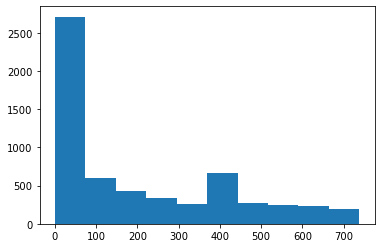

In [53]:
last_purchased_date['Recency'] = last_purchased_date['Recency'].dt.components['days']
plt.hist(last_purchased_date['Recency'])

In [ ]:
### modeling

In [54]:
customers = np.unique(retail['Customer ID'])

In [55]:
len(customers)

5942

In [59]:
retail['date'] = retail['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [60]:
retail['date'] 

0          2009-12-01
1          2009-12-01
2          2009-12-01
3          2009-12-01
4          2009-12-01
              ...    
1067366    2011-12-09
1067367    2011-12-09
1067368    2011-12-09
1067369    2011-12-09
1067370    2011-12-09
Name: date, Length: 797885, dtype: object

In [65]:
customer_grouped = retail.groupby(['Customer ID', 'date'], as_index=False).count()[['Customer ID', 'date']]

In [66]:
customer_grouped

,Customer ID,date
0,12346.0,2009-12-14
1,12346.0,2009-12-18
2,12346.0,2010-01-04
3,12346.0,2010-01-14
4,12346.0,2010-01-22
...,...,...
38497,18287.0,2010-09-21
38498,18287.0,2010-11-22
38499,18287.0,2011-05-22
38500,18287.0,2011-10-12


In [67]:
inter_data = pd.DataFrame()
for customer in customers:
    c_d = customer_grouped[customer_grouped['Customer ID'] == customer]
    c_d['previous_date'] = c_d['date'].shift(1)
    inter_data = pd.concat([inter_data,c_d], axis=0)
    

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarni

In [69]:
inter_data['previous_date'] = pd.to_datetime(inter_data['previous_date'])

In [70]:
inter_data['date'] = pd.to_datetime(inter_data['date'])

In [71]:
inter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38502 entries, 0 to 38501
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer ID    38502 non-null  float64       
 1   date           38502 non-null  datetime64[ns]
 2   previous_date  32560 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 2.4 MB


In [74]:
inter_data['duration'] = inter_data['date'] - inter_data['previous_date']

In [76]:
inter_data['duration'] = inter_data['duration'].dt.components['days']

In [77]:
inter_data

,Customer ID,date,previous_date,duration
0,12346.0,2009-12-14,NaT,NaN
1,12346.0,2009-12-18,2009-12-14,4.0
2,12346.0,2010-01-04,2009-12-18,17.0
3,12346.0,2010-01-14,2010-01-04,10.0
4,12346.0,2010-01-22,2010-01-14,8.0
...,...,...,...,...
38497,18287.0,2010-09-21,2010-05-17,127.0
38498,18287.0,2010-11-22,2010-09-21,62.0
38499,18287.0,2011-05-22,2010-11-22,181.0
38500,18287.0,2011-10-12,2011-05-22,143.0


In [78]:
inter_arrival = inter_data.groupby('Customer ID')['duration'].mean()

In [79]:
inter_arrival

Customer ID
12346.0     40.000000
12347.0     57.428571
12348.0     90.750000
12349.0    179.250000
12350.0           NaN
              ...    
18283.0     36.388889
18284.0      2.000000
18285.0           NaN
18286.0    123.500000
18287.0    116.000000
Name: duration, Length: 5942, dtype: float64

In [83]:
stocks = pd.read_csv(r'{0}/stocks.csv'.format(path), index_col='Date', parse_dates=True)

In [84]:
stocks

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-03,111.937502,116.000000,108.062500,116.562500
2000-01-04,102.500003,112.062500,102.000000,112.625000
2000-01-05,103.999997,116.000000,101.687500,113.812500
2000-01-06,94.999998,114.000000,100.000000,110.000000
2000-01-07,99.500001,113.500000,105.875000,111.437500
...,...,...,...,...
2013-12-24,567.669975,183.220001,21.690001,37.080002
2013-12-26,563.900009,185.350006,21.799999,37.439999
2013-12-27,560.089989,185.080002,22.020000,37.290001


In [85]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3521 entries, 2000-01-03 to 2013-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3521 non-null   float64
 1   IBM     3521 non-null   float64
 2   CSCO    3521 non-null   float64
 3   MSFT    3521 non-null   float64
dtypes: float64(4)
memory usage: 137.5 KB


<AxesSubplot:xlabel='Date'>

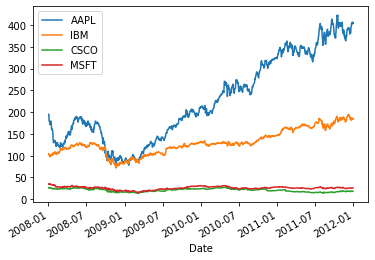

In [91]:
stocks['2008':'2011'].plot()

In [92]:
month_series_mean = stocks.resample('M').mean()

<AxesSubplot:xlabel='Date'>

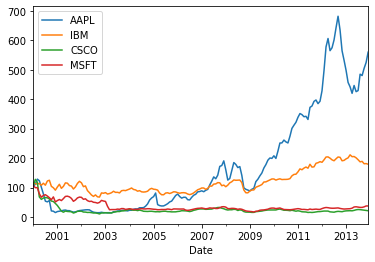

In [93]:
month_series_mean.plot()

In [96]:
year_series_mean = stocks.resample('Y').mean()

<AxesSubplot:xlabel='Date'>

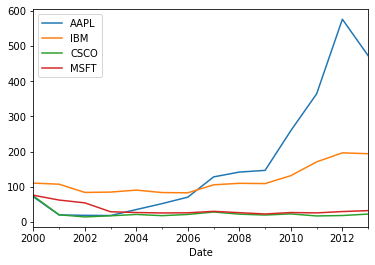

In [97]:
year_series_mean.plot()

In [98]:
week_series_mean = stocks.resample('W').mean()

<AxesSubplot:xlabel='Date'>

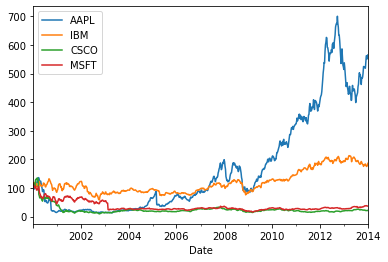

In [99]:
week_series_mean.plot()

In [101]:
year_series_sum = stocks.resample('Y').sum()

<AxesSubplot:xlabel='Date'>

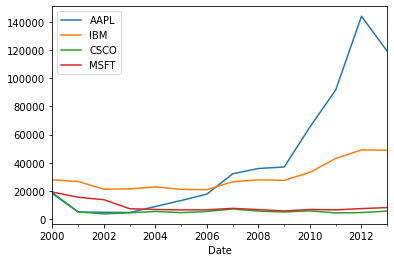

In [102]:
year_series_sum.plot()

In [107]:
MSFT = stocks[['MSFT']]

In [108]:
MSFT['rolling_weekly'] = MSFT.rolling(window=7).mean()

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

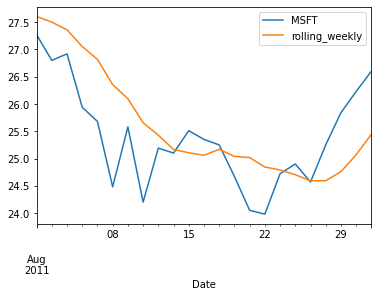

In [111]:
MSFT['Aug-2011'].plot()

In [112]:
MSFT['rolling_monthly'] = MSFT['MSFT'].rolling(window=30).mean()

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

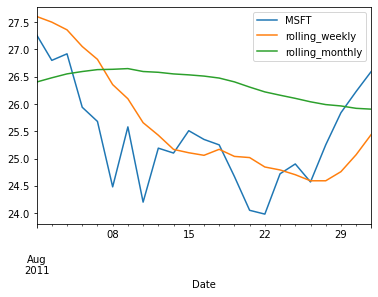

In [115]:
MSFT['Aug-2011'].plot()